## El método de Newton-Raphson

Tomemos una función real derivable en una variable $f(x)$. Queremos hallar sus **_raíces_**, es decir, los valores de $x$ para los que la función vale cero. Como ejemplo, utlizaremos el polinomio $f(x)=(x^2-4)(x-4)$. Supongamos que comenzamos ensayando un número cualquiera, por ejemplo $x_0=0.3$. Notemos que $f(x_0)=14.467$, así que claramente esta no es una raíz. Sin embargo, podemos aproximar la función alrededor del punto $x_0$ mediante la recta tangente a ese punto. Esta recta tiene una ecuación de la forma:
$$
\begin{equation}
\frac{y_0(x)-f(x_0)}{x-x_0}=f'(x_0)\;,
\tag{1}
\end{equation}
$$
donde $f'(x_0)$ es la derivada en el punto $x_0$. Esta recta corta el eje $x$ en el punto $x_1=x_0-\frac{y_0}{f'(x_0)}$. La esperanza es que este nuevo punto esté más cerca a una raíz, pues aproximamos el comportamiento de la función para hallarlo. Muy probablemente, al calcular $f(x_1)$ también encontraremos que $f(x_1) \neq 0$. Aún así, podemos repetir el procedimiento antes descrito y hallar un $x_2=x_1-\frac{f(x_1)}{f'(x_1)}$. Así, se define iterativamente una sucesión $x_0,x_1,x_2,x_3,\ldots$ con $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$. Si definimos que queremos hallar nuestra raíz con una precisión $\epsilon$, es decir, iteramos el método hasta un paso $N$ para el que $|f(x_N)|<\epsilon$, nos podremos dar por satisfechos de haber encontrado numéricamente una raíz. Esta es la esencia del **_método de Newton-Raphson_**. Quedan por aclarar dos detalles técnicos:
1. El primero es qué hacer si $f'(x_i)=0$. En este caso simplemente se cambia $x_i$ a un $x_{i+1}$ cercano escogido por cualquier método.
2. El segundo es que la ráiz hallada dependerá necesariamente del número inicial $x_0$. No existe una manera fácil en la que en general se hallen todas las raíces en un intervalo. Sin embargo, por ensayo y error se pueden elegir todos los número iniciales $x_0$ pertinentes para hallar todas las raíces de interés.

La siguiente pieza de código define nuestra función en particular y muestra gráficamente la situación cuando comenzamos buscando la raíz con $x_0=0.3$ y se calculan los primeros tres valores de las sucesión $\{x_i\}$. La recta naranja es $y_0(x)$ y se puede notar que $x_1$ ya está más cerca a una raíz de la función. La siguiente recta en la iteración es la recta verde $y_1(x)$. Nótese también  que la recta roja $y_2(x)$ ya casi llega a la raíz $x=2$ del polinomio.

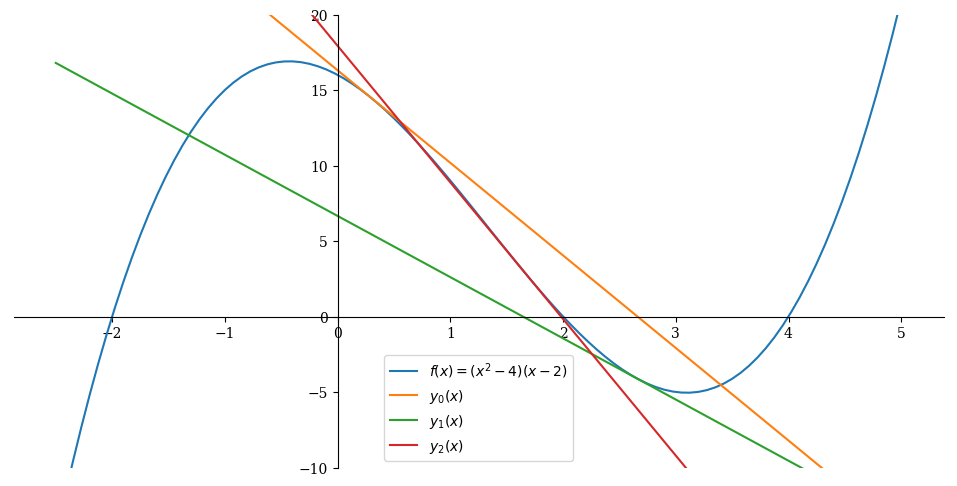

In [2]:
#Importamos algunas librerías
import matplotlib.pyplot as plt
import numpy as nmp
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
#rcParams['text.usetex'] = True

#Definimos la función y la primera derivada
fun= lambda x:(x**2-4)*(x-4)
funp= lambda x:(x-2)*(x-4)+(x+2)*(x-4)+(x-2)*(x+2)

#Definimos los puntos por graficar
x=nmp.linspace(-2.5,5,101)
ygf=fun(x)
x0=0.3
y0=fun(x0)
m0=funp(x0)
#Definimos los puntos de la recta aproximada (y-y0)/(x-x0)=m0
yg0=y0+m0*(x-x0)
#Definimos la siguiente iteración
x1=x0-y0/m0
y1=fun(x1)
m1=funp(x1)
yg1=y1+m1*(x-x1)
#Definimos la siguiente iteración
x2=x1-y1/m1
y2=fun(x2)
m2=funp(x2)
yg2=y2+m2*(x-x2)

plt.figure(figsize=(12,6),dpi=100)
plt.plot(x,ygf)
plt.plot(x,yg0)
plt.plot(x,yg1)
plt.plot(x,yg2)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.legend(['$f(x)=(x^2-4)(x-2)$','$y_0(x)$','$y_1(x)$','$y_2(x)$'])
plt.ylim(-10,20)
plt.show()

La siguiente pieza de código define la rutina **findroots** que halla las raíces de la función $f(x)$ a partir de un vector **xv** de valores iniciales de ensayo. Después se ensaya la rutina con el polinomio $f(x)=(x^2-4)(x-4)$ y los valores iniciales $\vec{x}_0=\{0.3,-0.4,-3\}$

In [9]:
def findroots(f,fp,xv=[0.3],err=1e-5,countl=50):
# La función tiene como entradas necesarias la función f y su derivada fp
# xv: La siguiente entrada es el vector de posibles valores iniciales x0
# err: es la precisión con la que se quiere hallar las raíces
# countl: es el número máximo de iteraciones en la búsqueda de una raíz. Esto evita que se caiga en un bucle infinito
    nr=len(xv)
    xn=xv[0]
    roots=[]
    for ir in range(nr):        
#---------------- Comienzo de búsqueda de raíz ---------------
        count=0
        while (abs(f(xn))>err):
            if (count>countl):
                break
            feval=f(xn); fpeval=fp(xn)
# Para monitorear el método, observamos el valor de xn y f(xn) en cada paso            
            print("Valor de (x"+str(count)+",y"+str(count)+")=("+str(round(xn,3))+","+str(round(f(xn),3))+")")
            if (fpeval==0) :
                xn=xn+0.1
            else:
                xn=xn-feval/fpeval
            count+=1
#---------------- Final de búsqueda de raíz ---------------             
# Imprime el resultado de la búsqueda            
        if (count>countl): 
            print("No se halló raíz. Se ha llegado al máximo número de iteraciones: "+str(countl))
        else:
            print("Raíz hallada: (x"+str(count)+",y"+str(count)+")= (",round(xn,3),",",round(f(xn),3),")")
        roots.append(round(xn,3))
# Paso a la siguiente búsqueda de raíz        
        if (ir<nr-1):
            xn=xv[ir+1]
# El output es una lista de raíces con precisión a 3 cifras decimales        
    return roots

# Se llama la rutina y se muestran los resultados
roots=findroots(fun,funp,[0.3,-0.4,-3])
print("Raíces halladas: "+str(roots))

Valor de (x0,y0)=(0.3,14.467)
Valor de (x1,y1)=(2.66,-4.121)
Valor de (x2,y2)=(1.643,3.064)
Valor de (x3,y3)=(1.982,0.146)
Valor de (x4,y4)=(2.0,0.001)
Raíz hallada: (x5,y5)= ( 2.0 , 0.0 )
Valor de (x0,y0)=(-0.4,16.896)
Valor de (x1,y1)=(52.4,132701.184)
Valor de (x2,y2)=(35.418,39285.056)
Valor de (x3,y3)=(24.116,11617.921)
Valor de (x4,y4)=(16.609,3428.029)
Valor de (x5,y5)=(11.646,1006.529)
Valor de (x6,y6)=(8.397,292.398)
Valor de (x7,y7)=(6.313,82.942)
Valor de (x8,y8)=(5.038,22.206)
Valor de (x9,y9)=(4.341,5.065)
Valor de (x10,y10)=(4.057,0.707)
Valor de (x11,y11)=(4.002,0.024)
Valor de (x12,y12)=(4.0,0.0)
Raíz hallada: (x13,y13)= ( 4.0 , 0.0 )
Valor de (x0,y0)=(-3,-35)
Valor de (x1,y1)=(-2.255,-6.796)
Valor de (x2,y2)=(-2.023,-0.567)
Valor de (x3,y3)=(-2.0,-0.005)
Raíz hallada: (x4,y4)= ( -2.0 , -0.0 )
Raíces halladas: [2.0, 4.0, -2.0]
